In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine = pd.read_csv('winequality_combined.csv')
wine.head()

,wine_type,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile acidity
0,r,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,r,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,r,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,r,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,r,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Users\richa\AppData\Local\Temp\ipykernel_13004\1367274845.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wine.corr()


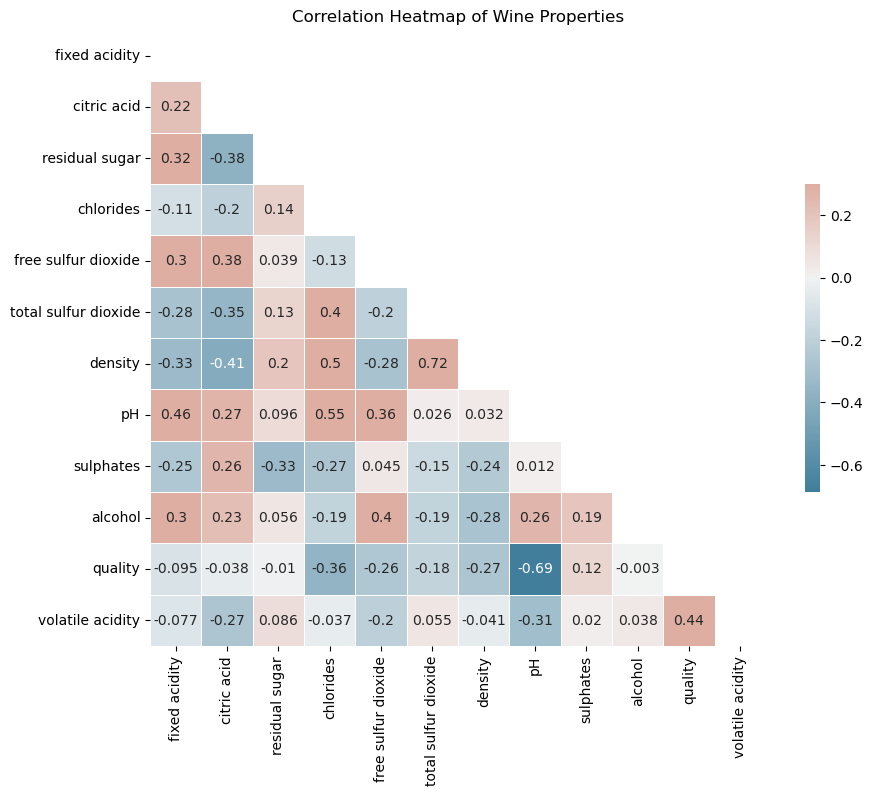

In [3]:
#Correlation Heatmap

# Compute the correlation matrix
corr = wine.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap of Wine Properties')
plt.show()


The heatmap provides insight into how various wine properties correlate with each other. Positive values indicate a direct relationship, where as one variable increases, so does the other. Negative values indicate an inverse relationship. For example, alcohol content might show a positive correlation with quality, indicating that higher alcohol content is associated with higher quality ratings. Other properties, like volatile acidity, might show negative correlations with quality, suggesting that lower levels of these properties are associated with higher quality wines. The heatmap is crucial for identifying potential factors that influence wine quality and for guiding further analysis.

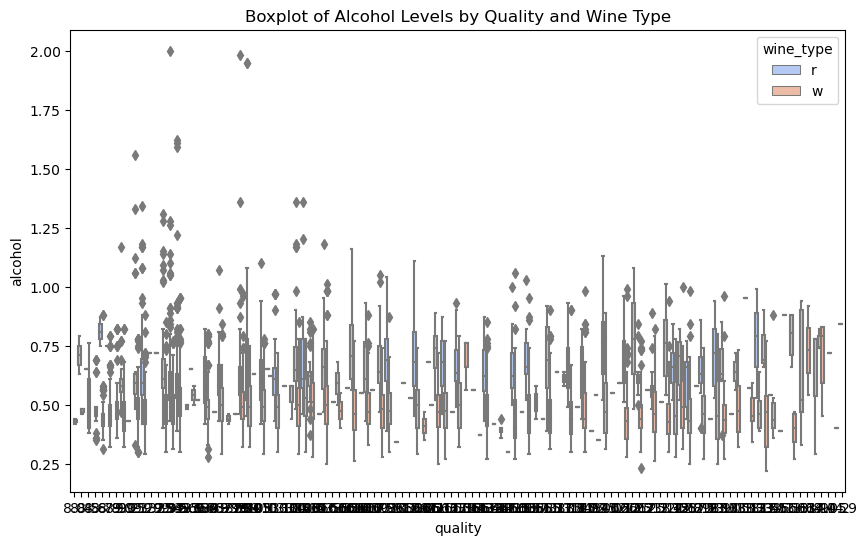

In [4]:
#Boxplot of Alcohol Levels by Quality and Wine Type

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', hue='wine_type', data=wine, palette='coolwarm')
plt.title('Boxplot of Alcohol Levels by Quality and Wine Type')
plt.show()


This visualization compares the distribution of alcohol levels across different quality ratings for red and white wines. If certain quality levels have wider interquartile ranges, it indicates more variation in alcohol content within that quality category. A higher median (the line inside the box) for higher quality ratings would suggest that wines with higher alcohol content tend to be rated higher in quality. The presence of outliers (dots outside the whiskers) indicates wines that deviate significantly from the norm for their quality rating.

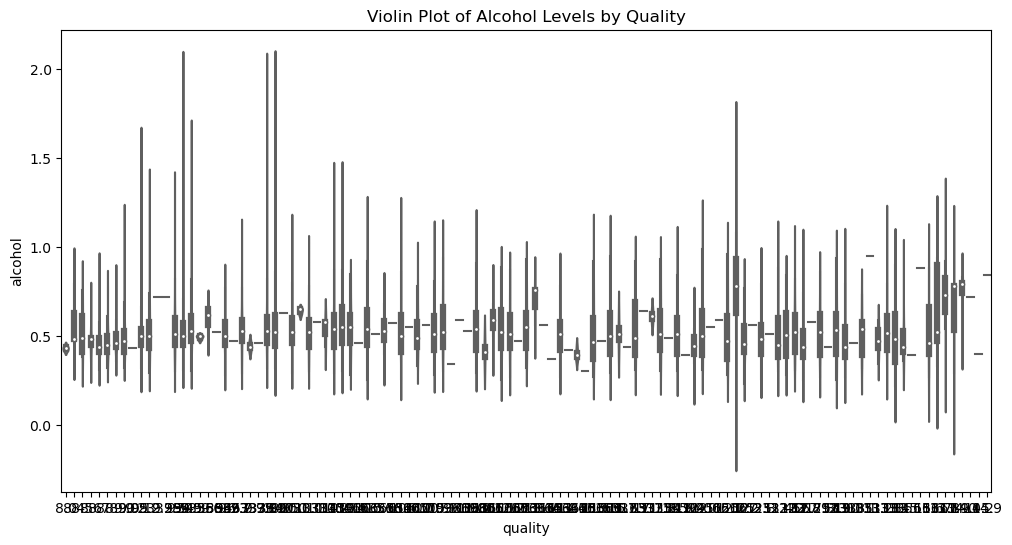

In [5]:
#Violin Plot of Alcohol Levels by Quality

plt.figure(figsize=(12, 6))
sns.violinplot(x='quality', y='alcohol', data=wine, palette='Set3')
plt.title('Violin Plot of Alcohol Levels by Quality')
plt.show()


The violin plot combines elements of a box plot with a kernel density plot. This visualization not only shows the median and interquartile ranges (like the boxplot) but also provides insight into the distribution of alcohol levels for each quality rating. The width of the "violin" at different alcohol levels indicates the density of data points, allowing us to see if there are any common alcohol levels within each quality rating. A wider section suggests a higher concentration of wines at that alcohol level. This plot is particularly useful for seeing the distribution shape and the range of variations within each quality category.

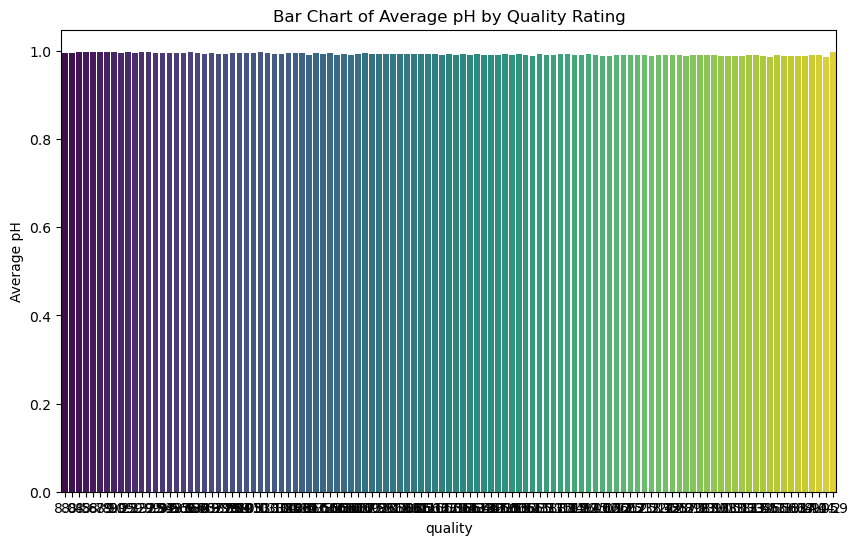

In [6]:
#Bar Chart of Average pH by Quality Rating

# Calculate average pH for each quality rating
avg_pH_by_quality = wine.groupby('quality')['pH'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='pH', data=avg_pH_by_quality, palette='viridis')
plt.title('Bar Chart of Average pH by Quality Rating')
plt.ylabel('Average pH')
plt.show()


This bar chart illustrates the average pH level for wines across different quality ratings. A noticeable trend in pH level changes across quality ratings could indicate the importance of pH balance in determining wine quality. For instance, if higher quality wines tend to have a specific pH range, this suggests that controlling pH within that range could be vital for producing high-quality wines.
The varying colors across bars serve purely aesthetic purposes and do not convey different data categories or distinctions. The color gradient, from the 'viridis' palette, enhances visual appeal and readability but does not encode any specific meaning related to the data. The focus of the chart is on comparing the average pH values across different quality ratings, as indicated by the height of the bars.

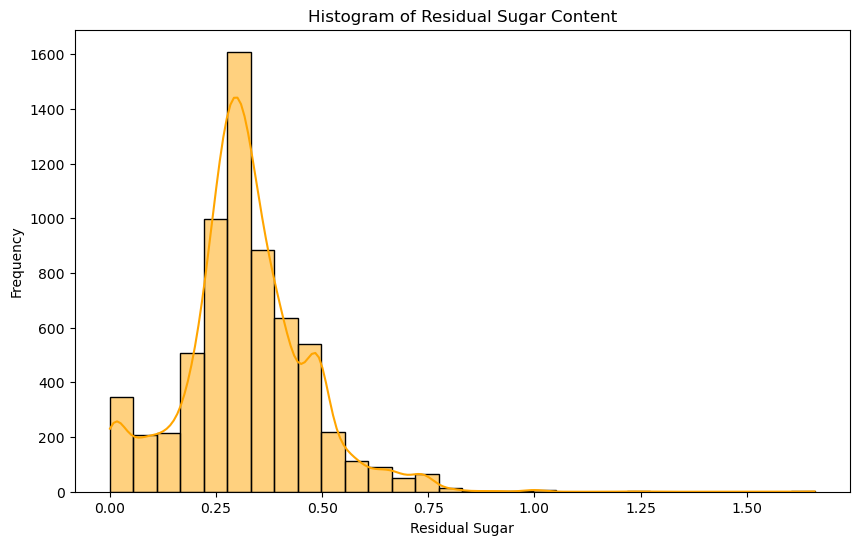

In [7]:
#Histogram of Residual Sugar Content

plt.figure(figsize=(10, 6))
sns.histplot(wine['residual sugar'], bins=30, kde=True, color='orange')
plt.title('Histogram of Residual Sugar Content')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of residual sugar content across the wines, giving us an idea of the overall sweetness profile of the dataset. A skewed distribution could indicate that most wines have low residual sugar, with fewer wines having very high sugar content. Peaks in the histogram show the most common levels of residual sugar, and the spread indicates the diversity in sweetness among the wines. This visualization is key for understanding how sweetness varies across the dataset and could help in segmenting wines into categories like dry, off-dry, sweet, etc.